In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("owid-covid-data.csv", parse_dates=['date'])
# data[data["location"] == "Russia"]

# 1 Bar Charts

In [291]:
# Сравнение стран с максимальным и минимальным количеством случаев заболеваний. 
# Статистика показывает, что минимальное количество заболеваний приходится на страны среднего востока, максимальное - на Европу.
# При этом следует отметить, что "открытая" Швеция имеет минимальное количество случаев среди соседей.
# Количество заболеваний в России находится на достаточно низком уровне

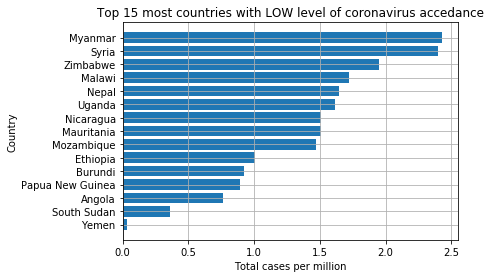

In [292]:
country_barh = data[(data["date"] == "2020-04-24")].sort_values('total_cases_per_million', ascending=True).head(15)
plt.barh(country_barh["location"], country_barh['total_cases_per_million'])
plt.xlabel('Total cases per million')
plt.ylabel('Country')
plt.title("Top 15 most countries with LOW level of coronavirus accedance")
plt.grid()

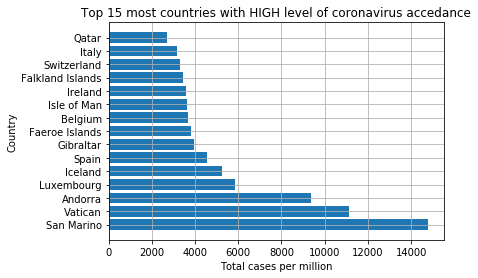

In [293]:
country_barh = data[(data["date"] == "2020-04-24")].sort_values('total_cases_per_million', ascending=False).head(15)
plt.barh(country_barh["location"], country_barh['total_cases_per_million'])
plt.xlabel('Total cases per million')
plt.ylabel('Country')
plt.title("Top 15 most countries with HIGH level of coronavirus accedance")
plt.grid()

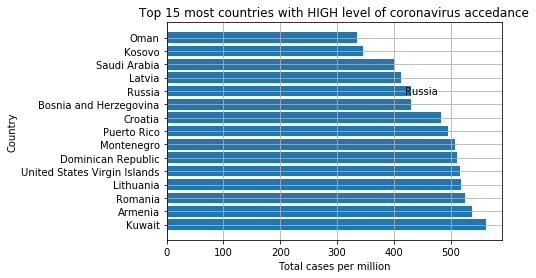

In [294]:
country_barh = data[((data["date"] == "2020-04-24") & 
                     (data["total_cases_per_million"] > 300) & 
                     (data["total_cases_per_million"] < 600))].sort_values('total_cases_per_million', 
                                                                           ascending=False).head(15)
plt.barh(country_barh["location"], country_barh['total_cases_per_million'])
plt.xlabel('Total cases per million')
plt.ylabel('Country')
plt.title("Top 15 most countries with HIGH level of coronavirus accedance")
plt.text(420, 10, 'Russia', horizontalalignment='left', verticalalignment='center')
plt.grid()

# 2 Curves (Plot)

In [297]:
# Сравнение России со страной с похожим уровнем заболеваемости сравнить скорость изменения уровня заболеваемости, 
# что может косвенно указыать на эффективность принимаемых мер со стороны обеих стран

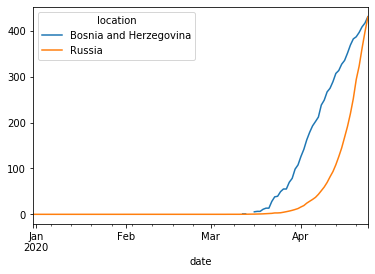

In [298]:
dynamic_curves = data[(data["location"] == "Russia") | 
                      (data["location"] == "Bosnia and Herzegovina")].groupby(["date", 
                                                                               "location"]).mean().unstack("location")
dynamic_curves["total_cases_per_million"].plot()

# 3 Plot Box

In [299]:
# Сравнение России со страной с похожим уровнем заболеваемости, с помощью Box Plot, позволяет показать, 
# что средний уровень заболеваемости в России стремиться к нулю (не считая выборосов), по сравнению с медианой в 5 человек на 1 млн.
# в Боснии и Герцеговине

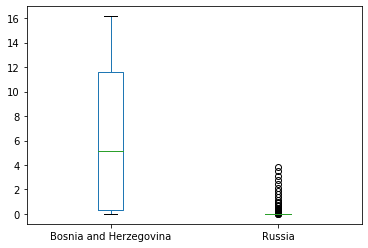

In [301]:
plot_box = data[(data["location"] == "Russia") | 
                      (data["location"] == "Bosnia and Herzegovina")].groupby(["date", "location"]).mean().unstack("location")
plot_box["total_deaths_per_million"].plot(kind='box')

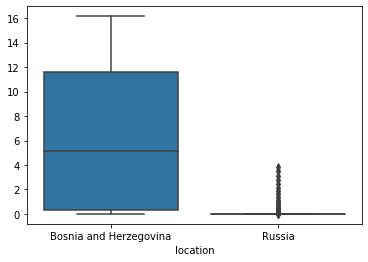

In [302]:
sns.boxplot(data=plot_box["total_deaths_per_million"])

# 4 Heatmap

In [303]:
# Heatmap позволяет найти отличия между сравниваемыми объектами, так например, наибольшее количество случаев заболевания 
# приходится на Сан Марино, но при этом там достаточно низкий уровень смертности, а в Испании наоборот - количество случае
# гораздо меньше при максимально высоком уровне смертности

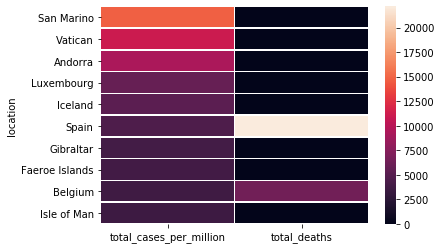

In [309]:
comparison_table = pd.pivot_table(data[(data["date"] == "2020-04-24")], index="location", 
                                  values=["total_cases_per_million", 
                                          "total_deaths"], aggfunc=sum).sort_values("total_cases_per_million", 
                                                                                   ascending=False).head(10)
# comparison_table
sns.heatmap(comparison_table, linewidths=0.5)

# 5 Pairplot

In [305]:
# Pairplot хорошо показывает, что количество случаев заболевания не всегда коррелиррует со смертностью, в разных странах

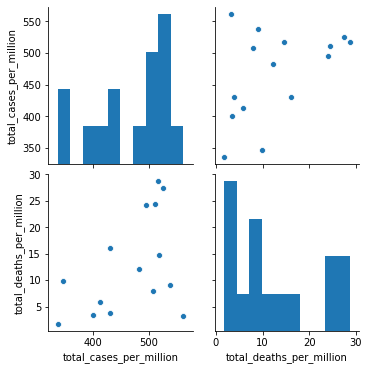

In [306]:
deths_plot = data[((data["date"] == "2020-04-24") & 
                     (data["total_cases_per_million"] > 300) & 
                     (data["total_cases_per_million"] < 600))].sort_values('total_cases_per_million', 
                                                                           ascending=False).head(15)
deths_plot = sns.pairplot(deths_plot[['total_cases_per_million', 'total_deaths_per_million']])
deths_plot

# 5 Jointplot

In [307]:
# В целом, без учета выбросов, с ростом количества заболевших растет и количество смертельных случаев

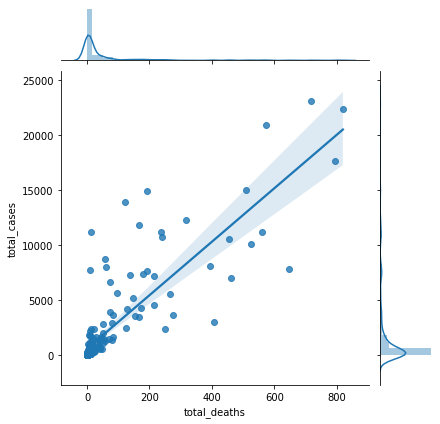

In [308]:
join_plot = data[(data["date"] == "2020-04-24") & 
                 (data["total_deaths"] < 1000) & 
                 (data["total_cases"] < 50000)].sort_values('total_cases_per_million', ascending=False)
sns.jointplot(x='total_deaths', y='total_cases', 
              data=join_plot, kind='reg')